<div style=" padding:20px; border-radius:10px;">
  <h1 style="font-size:28px; font-family:calibri;"><b>Retail Sales Forecasting & Segment Analysis</b></h1>
  <h2 style="font-size:20px; font-family:calibri;">Time-Series Forecasting and Exploratory Analytics using Prophet & SARIMA</h2>
</div>

<div style=" padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🎯 Introduction</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Welcome to this data-driven journey where we analyze four years of global retail transactions to uncover patterns, segment insights, and forecast sales. We leverage Python, Prophet, and SARIMA models to project future demand and assist in inventory, logistics, and strategy planning.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    Whether you're a business analyst, data scientist, or retail strategist, this notebook demonstrates how to bridge data with impact.
  </p>
</div>

<div style=" padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📌 Problem Statement</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    The goal is to analyze historical sales data to extract business insights and forecast future demand. We focus on:
    <ul>
      <li>Identifying sales patterns over time and across customer segments</li>
      <li>Recognizing seasonality and outliers in daily sales</li>
      <li>Forecasting sales for the upcoming week using Prophet and SARIMA</li>
      <li>Comparing model performance and recommending operational decisions</li>
    </ul>
  </p>
</div>

<div style=" padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📁 About the Dataset</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    The dataset contains <b>9,800 retail transactions</b> over four years from a global superstore. It includes order-level details across customer demographics, geography, product info, and order metrics. The dataset is clean, structured, and ideal for time-series and customer analytics.
  </p>
</div>

<div style= padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🛠️ Project Workflow</b></h2>
  <ol style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>Inspect and clean dataset (convert dates, drop irrelevant columns)</li>
    <li>Visualize daily, yearly, and regional sales trends</li>
    <li>Analyze product category and sub-category sales</li>
    <li>Segment customers and evaluate segment-wise performance</li>
    <li>Forecast future daily sales using Prophet and SARIMA</li>
    <li>Compare models, interpret results, and guide strategy</li>
  </ol>
</div>

# Dataset Introduction

This dataset contains 9,800 retail transactions from a global superstore spanning across four years. It captures detailed information about each order, including:

> Dates: Order and shipping dates

> Customer Info: Customer ID, name, and segment

> Geography: Country, city, state, postal code, and region

> Product Info: Product ID, category, sub-category, and name

> Order Details: Sales value, quantity, discount, and profit

The dataset is clean and well-structured, with only a few missing postal codes, making it ideal for robust business analytics and forecasting.

# Load and Inspect the Dataset

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.abspath(".."))
from src_utils import (
    prepare_daily_sales,
    rolling_backtest,
    residual_bootstrap_quantiles,
    pinball_loss,
)

# Step 2: Load the dataset
file_path = '../data/train.csv'
df = pd.read_csv(file_path)

# Step 3: Show basic information
print("Dataset shape:", df.shape)
print("\nFirst five rows:")
display(df.head())

# Step 4: Overview of column data types and missing values
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (9800, 18)

First five rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float6

# Data Cleaning & Preprocessing

Goals:
> Convert date columns to datetime format

> Drop unnecessary columns (like Row ID)

> Decide how to handle the missing postal codes

> Ensure numerical data is correctly typed

> (Optional) Create a new column for aggregated daily sales for forecasting

In [7]:
# Convert Order Date and Ship Date to datetime with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Drop 'Row ID' – not meaningful
df.drop(columns=['Row ID'], inplace=True)

# Check missing Postal Code entries
print("Missing postal codes:")
print(df[df['Postal Code'].isnull()][['City', 'State']].drop_duplicates())

Missing postal codes:
            City    State
2234  Burlington  Vermont


In [8]:
# Desired ZIP code to use for Burlington, Vermont
default_burlington_zip = 5401  # We search the internet for the Postal Code

# Impute missing postal codes specifically for Burlington, VT
mask = df['Postal Code'].isnull() & \
       (df['City'] == 'Burlington') & \
       (df['State'] == 'Vermont')
df.loc[mask, 'Postal Code'] = default_burlington_zip

# Recheck missing values across dataset
print("\nRemaining missing values after ZIP imputation:")
print(df.isnull().sum())


Remaining missing values after ZIP imputation:
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


# EDA Step 1: Sales Trends Over Time

Objective:
> Aggregate daily sales

> Visualize overall trend

> Optionally smooth using rolling average

# Time-Series Analysis

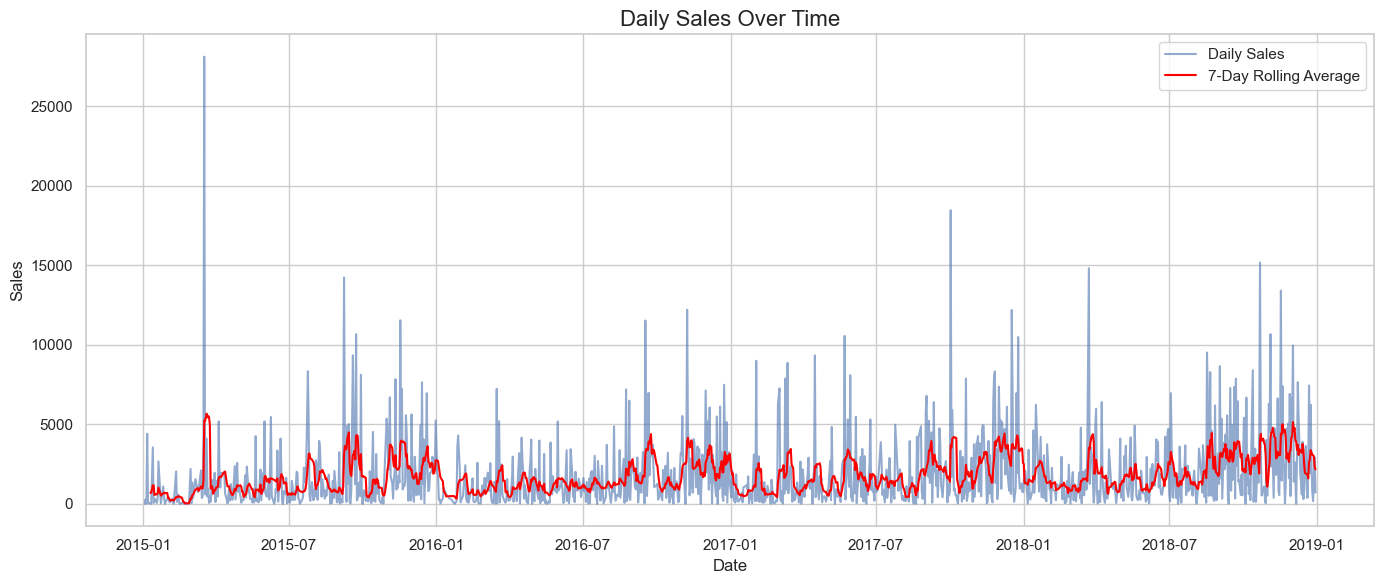

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Group by order date and sum sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Sort by date to ensure correct plotting
daily_sales.sort_values('Order Date', inplace=True)

# Plot daily sales
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', alpha=0.6)

# Add rolling average (7-day)
daily_sales['Rolling Avg'] = daily_sales['Sales'].rolling(window=7).mean()
plt.plot(daily_sales['Order Date'], daily_sales['Rolling Avg'], color='red', label='7-Day Rolling Average')

# Titles and labels
plt.title("Daily Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig("../assets/daily_series.png", dpi=200)
plt.show()

# Analysis of Daily Sales Trend

1. 📈 Overall Trend

> The rolling average (red line) shows a mild upward trend over the 4-year span.

> There’s increased sales activity in the second half of the dataset (2017–2018) compared to the earlier years (2015–2016).

2. 🔁 Seasonality

There are recurring patterns of sales spikes:

> Typically around end-of-year (Q4) → likely holiday season sales (e.g. November–December).

> Some spikes mid-year (June–July) could indicate mid-year promotions.

3. 🚀 Sales Spikes & Outliers

> Several sharp, high-volume spikes (especially early 2015, late 2016, and 2018).

> These spikes could be:

>* Bulk purchases

>* B2B transactions

>* Special campaigns or promotions

> One extreme spike in early 2015 surpasses $25,000 in a single day — worth isolating later to investigate the product or customer behind it.

4. 🛑 Volatility

> The blue line (raw daily sales) shows high volatility.

> Daily sales are often very low (near zero), with intermittent high-value days — suggesting lumpy demand, not steady daily flow.

> This may affect how we approach forecasting — we'll likely need smoothing, aggregation, or specialized models like Prophet or XGBoost with calendar features.

# EDA Step 2: Breakdown by Year
Objective:

> Visualize total yearly sales

> Compare year-over-year growth

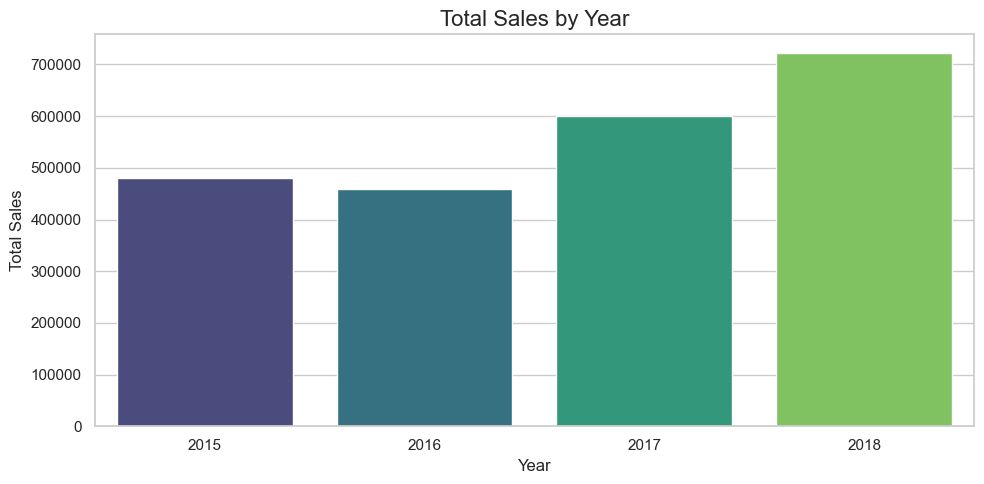

In [10]:
    # Extract year from Order Date
    df['Year'] = df['Order Date'].dt.year
    
    # Aggregate sales by year
    yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
    
    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(data=yearly_sales, x='Year', y='Sales', palette='viridis')
    
    # Labels and titles
    plt.title("Total Sales by Year", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Total Sales")
    plt.tight_layout()
    plt.show()

# Yearly Sales Trend Analysis

Sales increased significantly over time, especially after 2016.

Growth pattern:

> 2015 → 2016: Slight drop (~2–4%)

> 2016 → 2017: Noticeable increase (≈ +30%)

> 2017 → 2018: Continued strong growth (≈ +20%)

This shows accelerating business performance, likely due to:

> Expanded customer base

> Better marketing or promotions

> High-performing product categories or regions

# EDA Step 3: Regional Sales Analysis
Objectives:

> Compare total sales by region

> Identify top-performing and underperforming regions

> Visualize patterns clearly using bar plots

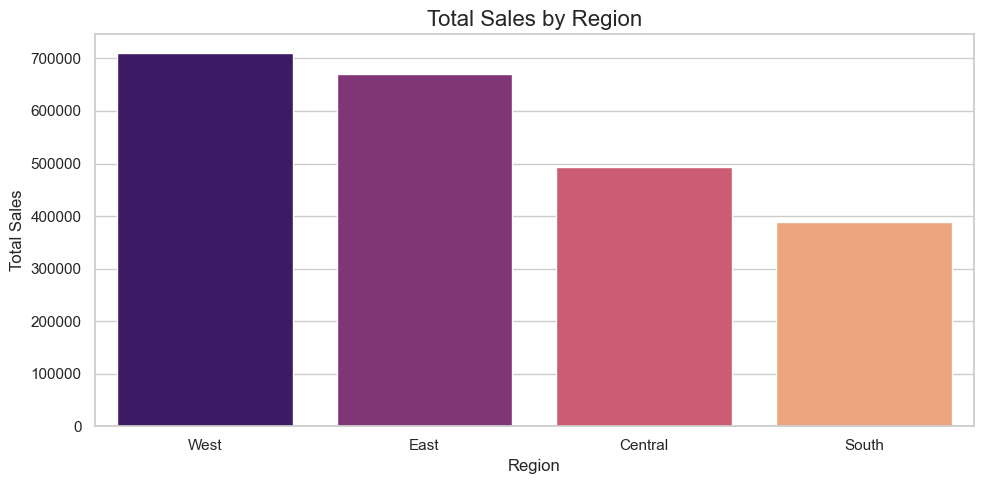

In [11]:
# Group sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='magma')

# Labels and title
plt.title("Total Sales by Region", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Regional Sales Analysis

West region leads with the highest total sales, just above $700,000.

East follows closely — strong performance, nearly matching the West.

Central and South lag significantly, with the South generating the lowest sales (~$390,000).

> Insight: West and East are the core revenue drivers, suggesting higher market maturity or stronger customer bases. Central and South could represent growth opportunities with targeted marketing or logistics improvements.

# EDA Step 4: Category & Sub-Category Sales Analysis

Objectives:

> Identify which categories drive the most revenue

> Break down performance by sub-category

> Spot niches with low sales (potential for improvement or removal)

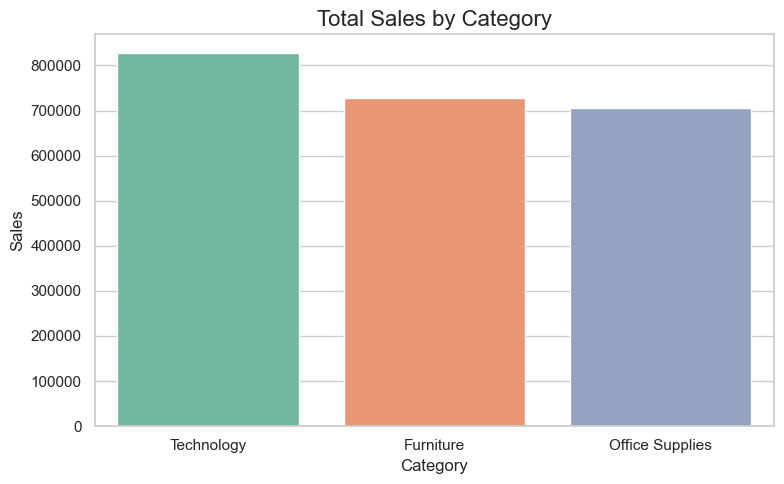

In [12]:
# Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='Set2')
plt.title("Total Sales by Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Category-Level Sales Analysis

Technology is the top-selling category, generating the highest revenue (~$830,000).

Furniture and Office Supplies are close behind, but clearly lag Technology.

All three categories contribute significantly, suggesting a diverse product mix.

> Insight: Technology is likely the most profitable or in-demand segment. However, the gap isn’t huge — all categories are worth maintaining or expanding strategically.

# EDA Step 5: Total Sales by Sub-Category

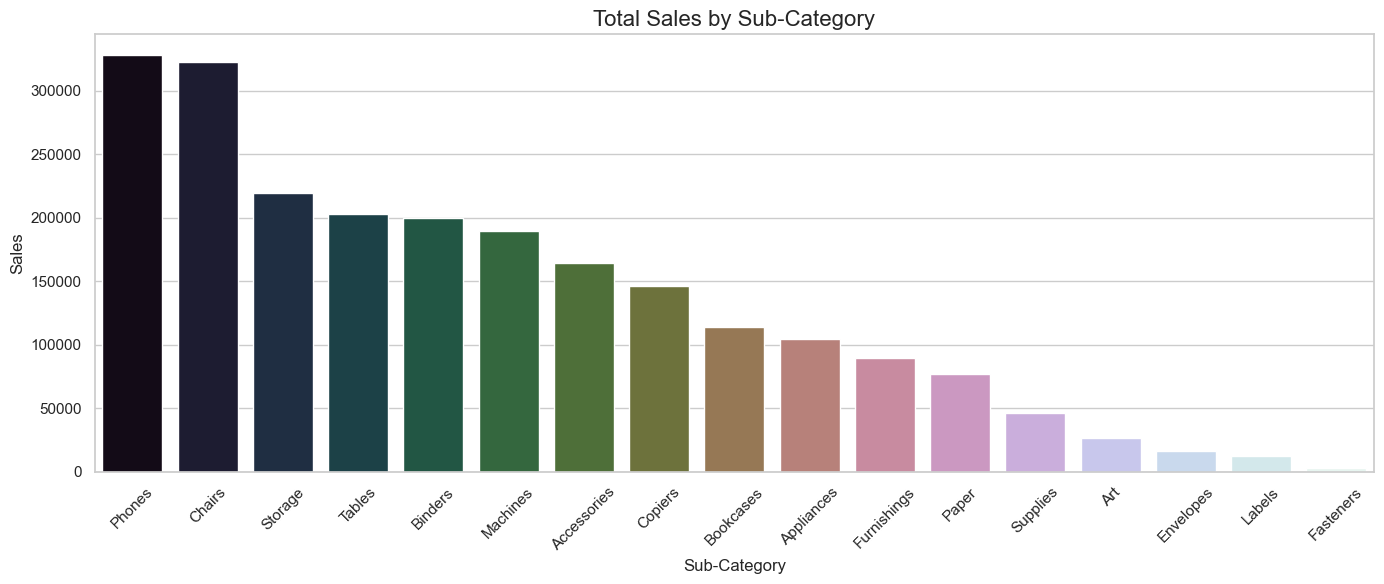

In [13]:
# Total Sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=subcat_sales, x='Sub-Category', y='Sales', palette='cubehelix')
plt.title("Total Sales by Sub-Category", fontsize=16)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sub-Category Sales Analysis

Top Performers:

> 📱 Phones and 💺 Chairs dominate, each generating over $300,000 in sales.

> Followed by Storage, Tables, and Binders — strong secondary contributors.

Mid-Tier:

> Items like Machines, Accessories, and Copiers also contribute meaningfully.

Low Performers:

> 🖼️ Art, ✉️ Envelopes, 🏷️ Labels, and 📎 Fasteners have very low sales, likely niche or low-demand products.

📌 Insight: Focus on expanding inventory and promotions around high-performing sub-categories. Consider evaluating pricing, marketing, or even phasing out low-sales items if margins are poor.

# EDA Step 5: Customer Segment Analysis

Objectives:

> Identify which customer segments drive the most revenue

> Compare performance between segments

> Guide targeting strategies (B2B vs B2C)



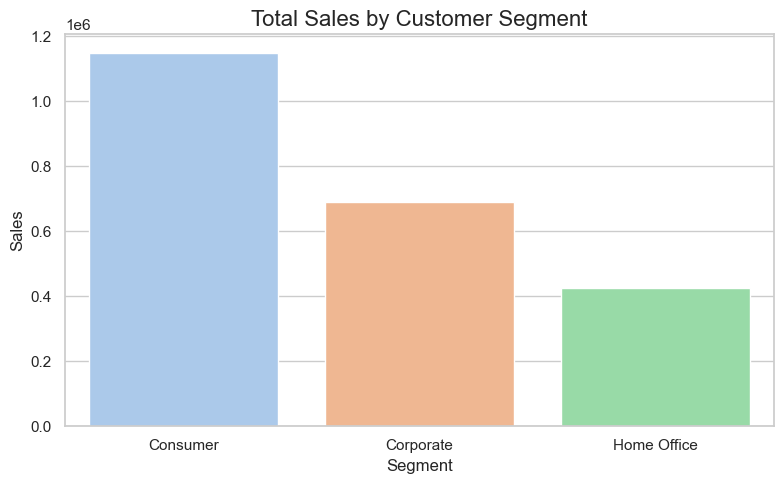

In [14]:
# Total Sales by Customer Segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='pastel')

# Labels and title
plt.title("Total Sales by Customer Segment", fontsize=16)
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Customer Segment Analysis

> Consumers are the dominant revenue source, contributing over $1.1 million — nearly half of total sales.

> Corporate customers follow with strong performance (~$670K).

> Home Office accounts for the smallest share, around $430K.

📌 Insight: Consumer segment is clearly the core market, but Corporate still offers significant value. Home Office may benefit from targeted offers or better product-market fit strategies to increase engagement.

# Forecasting Sales for the Next 7 Days Using Prophet Model

Objective:

> Build a model to predict daily sales for the 7 days following the last date in the dataset.

# Prepare Data for Forecasting

We’ll start with a simple, interpretable baseline using:

> Daily aggregated sales

> A forecast method like Prophet (good for business data with seasonality)

16:45:34 - cmdstanpy - INFO - Chain [1] start processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing


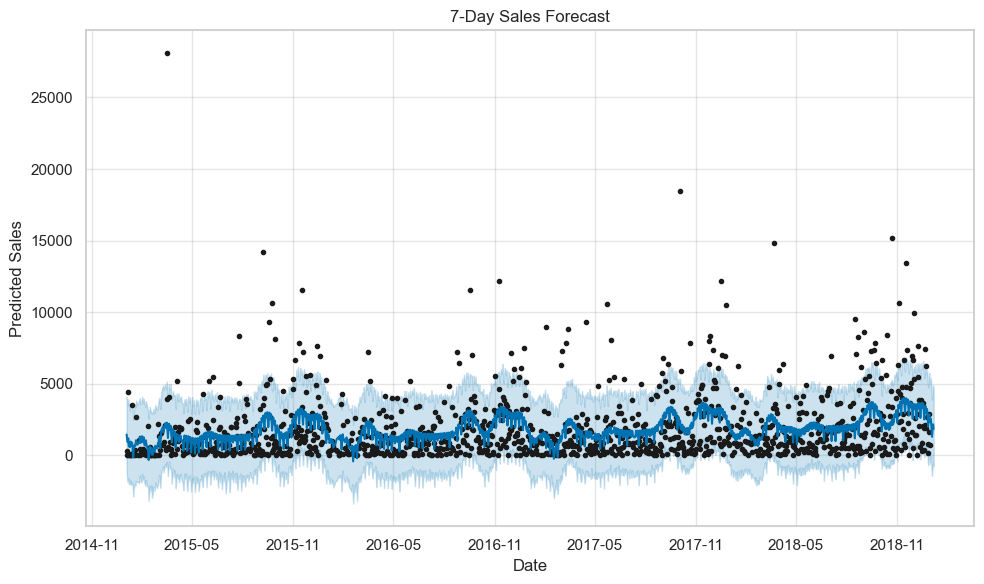

In [15]:
# Import Prophet
from prophet import Prophet

# Step 1: Aggregate daily sales
ts_df = df.groupby('Order Date')['Sales'].sum().reset_index()

# Step 2: Rename columns to match Prophet's expected input
ts_df.columns = ['ds', 'y']  # ds = date, y = value to forecast

# Step 3: Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(ts_df)

# Step 4: Create future dataframe for next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Step 5: Plot forecast
model.plot(forecast)
plt.title("7-Day Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.tight_layout()
plt.show()

In [16]:
# Get last date in original dataset
last_date = ts_df['ds'].max()

# Filter only the next 7 days
future_forecast = forecast[forecast['ds'] > last_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

# Rename columns for clarity
future_forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Sales',
    'yhat_lower': 'Lower Bound',
    'yhat_upper': 'Upper Bound'
}, inplace=True)

# Calculate average predicted sales
avg_sales = future_forecast['Predicted Sales'].mean()

# Create a new row for the average
average_row = pd.DataFrame({
    'Date': ['Average'],
    'Predicted Sales': [round(avg_sales, 2)],
    'Lower Bound': [None],
    'Upper Bound': [None]
})

# Append the row to the forecast DataFrame
forecast_with_avg = pd.concat([future_forecast, average_row], ignore_index=True)

# Display
print("📅 7-Day Sales Forecast with Average:")
display(forecast_with_avg)

📅 7-Day Sales Forecast with Average:


,Date,Predicted Sales,Lower Bound,Upper Bound
0,2018-12-31 00:00:00,2309.547969,-598.560957,5105.668445
1,2019-01-01 00:00:00,2555.673125,-62.171798,5411.856243
2,2019-01-02 00:00:00,1982.699849,-805.553482,4658.615382
3,2019-01-03 00:00:00,1306.102240,-1414.802807,3901.277026
4,2019-01-04 00:00:00,1828.030367,-936.812867,4466.112939
5,2019-01-05 00:00:00,2176.089379,-543.566563,4888.509912
6,2019-01-06 00:00:00,1856.256938,-772.269498,4721.155118
7,Average,2002.060000,NaN,NaN


# Prophet Model Forecast
The Prophet model predicts an average of ~2,002 units/day over the next 7 days. The forecast indicates stable sales without extreme volatility, guiding moderate restocking and staffing needs.

# Forecasting Sales for the Next 7 Days Using Seasonal Autoregressive Integrated Moving Average (SARIMA)

In [17]:
!pip install statsmodels
!pip install pmdarima


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.2 MB ? eta -:--:--Downloading pmdarima-2.0.4-cp312-cp312-macosx_11_0_arm64.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgr

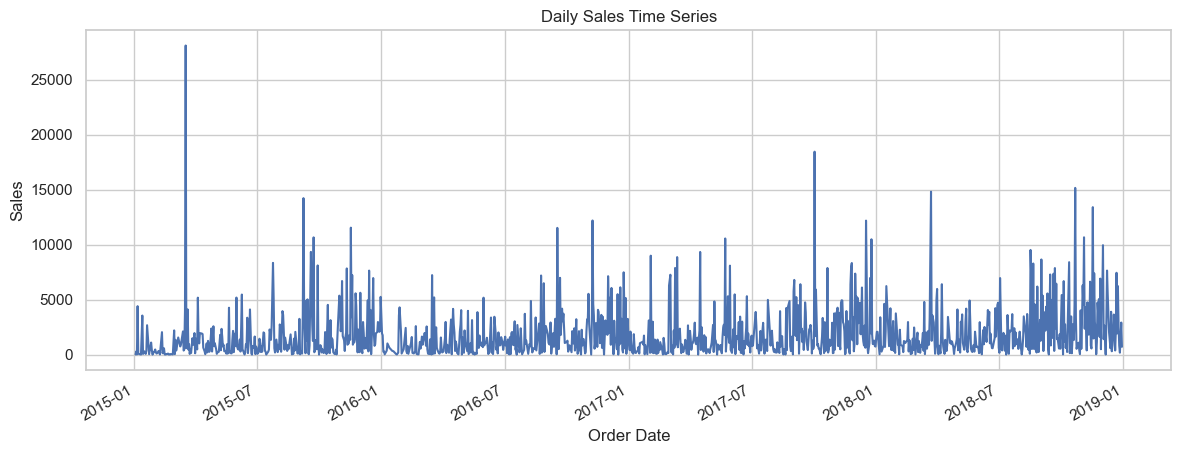

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the daily sales time series
ts_df = df.groupby('Order Date')['Sales'].sum().reset_index()
ts_df.set_index('Order Date', inplace=True)

# Ensure index is datetime
ts_df.index = pd.to_datetime(ts_df.index)

# Optional: Plot to visualize
ts_df['Sales'].plot(figsize=(14, 5), title="Daily Sales Time Series")
plt.ylabel("Sales")
plt.show()

# Automatically Select SARIMA Parameters
Why use auto_arima?

> It performs a stepwise search over ARIMA/SARIMA order combinations

> Selects optimal parameters based on AIC, BIC, etc.

> Handles differencing terms and seasonality intelligently

In [19]:
import pmdarima as pm

# Prepare your series (ts_df from earlier, indexed by date, daily frequency)
y = ts_df['Sales']

# Run auto_arima with daily seasonality (m=7)
auto_model = pm.auto_arima(
    y,
    seasonal=True,
    m=7,              # weekly seasonality
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# View best model details
print("✅ Best SARIMA model:", auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=22472.633, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=23227.473, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=22879.020, Time=0.10 sec
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=22472.633, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=23227.473, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=22879.020, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=22466.690, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=23225.473, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=22468.263, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=22466.690, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=23225.473, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=22468.263, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=22468.085, Time=0.71 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=22468.085, Time=0.71 sec
 ARIMA(0,1,1)(0,0,2

# Fit SARIMA & Forecast Next 7 Days

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(
    ts_df['Sales'],
    order=(0, 1, 1),
    seasonal_order=(1, 0, 0, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = model.fit(disp=False)

# Forecast next 7 days
forecast_steps = 7
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
forecast_mean = sarima_forecast.predicted_mean
conf_int = sarima_forecast.conf_int()

# Build forecast DataFrame
sarima_output = pd.DataFrame({
    'Date': pd.date_range(start=ts_df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps),
    'Predicted Sales': forecast_mean.values,
    'Lower Bound': conf_int.iloc[:, 0].clip(lower=0).values,
    'Upper Bound': conf_int.iloc[:, 1].values
})

# Add average row
avg_row = pd.DataFrame({
    'Date': ['Average'],
    'Predicted Sales': [round(sarima_output['Predicted Sales'].mean(), 2)],
    'Lower Bound': [None],
    'Upper Bound': [None]
})

sarima_output = pd.concat([sarima_output, avg_row], ignore_index=True)

# Display the forecast
print("📊 7-Day Sales Forecast (SARIMA):")
display(sarima_output)

📊 7-Day Sales Forecast (SARIMA):


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Date,Predicted Sales,Lower Bound,Upper Bound
0,2018-12-31 00:00:00,3130.195510,0.0,7980.778076
1,2019-01-01 00:00:00,2936.523158,0.0,7789.647445
2,2019-01-02 00:00:00,2833.260540,0.0,7688.925218
3,2019-01-03 00:00:00,2798.354846,0.0,7656.558586
4,2019-01-04 00:00:00,2879.444136,0.0,7740.185611
5,2019-01-05 00:00:00,2948.393355,0.0,7811.671242
6,2019-01-06 00:00:00,2827.736418,0.0,7693.549394
7,Average,2907.700000,NaN,NaN


# Interpretation

> The SARIMA model predicts higher average sales than Prophet (~2,908 vs ~2,003).

> It suggests a consistent daily demand between 2,800–3,100 units.

> The confidence intervals are wider (upper bound up to ~7,900), which still reflects the historical volatility of the dataset.

# SARIMA vs Prophet

In [21]:
# Prepare Prophet data (excluding average row)
prophet_clean = forecast_with_avg[forecast_with_avg['Date'] != 'Average'].copy()
prophet_clean['Date'] = pd.to_datetime(prophet_clean['Date'])

# Prepare SARIMA data (excluding average row)
sarima_clean = sarima_output[sarima_output['Date'] != 'Average'].copy()
sarima_clean['Date'] = pd.to_datetime(sarima_clean['Date'])

# Merge both forecasts on Date
comparison = pd.merge(
    sarima_clean[['Date', 'Predicted Sales']],
    prophet_clean[['Date', 'Predicted Sales']],
    on='Date',
    suffixes=('_SARIMA', '_Prophet')
)

# Optional: Add difference column
comparison['Difference'] = comparison['Predicted Sales_SARIMA'] - comparison['Predicted Sales_Prophet']

# Display
print("📊 SARIMA vs Prophet – 7-Day Forecast Comparison:")
display(comparison)

📊 SARIMA vs Prophet – 7-Day Forecast Comparison:


,Date,Predicted Sales_SARIMA,Predicted Sales_Prophet,Difference
0,2018-12-31,3130.195510,2309.547969,820.647541
1,2019-01-01,2936.523158,2555.673125,380.850033
2,2019-01-02,2833.260540,1982.699849,850.560691
3,2019-01-03,2798.354846,1306.102240,1492.252607
4,2019-01-04,2879.444136,1828.030367,1051.413769
5,2019-01-05,2948.393355,2176.089379,772.303977
6,2019-01-06,2827.736418,1856.256938,971.479480


In [22]:
daily = prepare_daily_sales(df, date_col="Order Date", value_col="Sales", agg="sum")
display(daily.head())

,ds,y
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


In [23]:
# Choose horizon/initial/step based on your data length
H, INIT, STEP = 14, 365, 14

bt_prophet = rolling_backtest(daily, horizon=H, initial=INIT, step=STEP, model="prophet")
bt_sarima  = rolling_backtest(daily, horizon=H, initial=INIT, step=STEP, model="sarima")

print("Prophet (fold metrics):")
display(bt_prophet["metrics"])

print("SARIMA (fold metrics):")
display(bt_sarima["metrics"])

# Optional: inspect a few fold predictions
display(bt_prophet["fold_preds"].head())

16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] done processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:47:18 - cmdstanpy - INFO - Chain [1]

Prophet (fold metrics):


,model,fold_start,fold_end,MAE,RMSE,sMAPE
0,prophet,2016-01-03,2016-01-16,2103.721649,2210.097457,161.336109
1,prophet,2016-01-17,2016-01-30,920.554345,1362.900054,153.651286
2,prophet,2016-01-31,2016-02-13,891.416299,998.920340,159.817287
3,prophet,2016-02-14,2016-02-27,863.831657,1085.234551,170.484838
4,prophet,2016-02-28,2016-03-12,890.207450,1235.664372,107.911479
...,...,...,...,...,...,...
73,prophet,2018-10-21,2018-11-03,2539.900700,4019.761088,98.937500
74,prophet,2018-11-04,2018-11-17,2516.738952,3610.466466,66.599293
75,prophet,2018-11-18,2018-12-01,2063.955178,2328.994197,70.152875
76,prophet,2018-12-02,2018-12-15,2270.786433,2775.974313,85.333119


SARIMA (fold metrics):


,model,fold_start,fold_end,MAE,RMSE,sMAPE
0,sarima,2016-01-03,2016-01-16,1912.644945,2026.094744,158.270957
1,sarima,2016-01-17,2016-01-30,1749.982245,1908.951678,155.318441
2,sarima,2016-01-31,2016-02-13,1113.046517,1216.533464,163.593672
3,sarima,2016-02-14,2016-02-27,805.236980,961.637659,140.155068
4,sarima,2016-02-28,2016-03-12,586.439266,685.878972,111.056700
...,...,...,...,...,...,...
73,sarima,2018-10-21,2018-11-03,2448.102965,3812.859158,97.565568
74,sarima,2018-11-04,2018-11-17,2250.910184,3602.815079,58.309012
75,sarima,2018-11-18,2018-12-01,1883.675370,2255.857000,65.478145
76,sarima,2018-12-02,2018-12-15,2253.875833,2682.914191,85.355592


,ds,y,yhat,fold,model
0,2016-01-03,1768.2216,2677.227631,1,prophet
1,2016-01-04,264.4600,2446.116453,1,prophet
2,2016-01-05,295.2720,3252.163916,1,prophet
3,2016-01-06,31.5380,3397.462017,1,prophet
4,2016-01-07,0.0000,2122.259314,1,prophet


In [24]:
# Reserve last horizon for evaluation
H = 28
history = daily.iloc[:-H]
test    = daily.iloc[-H:]

qfc = residual_bootstrap_quantiles(history, horizon=len(test), n_sims=400, quantiles=[0.1, 0.5, 0.9])
merged = test.merge(
    qfc.rename(columns={"yhat": "p50", "q10": "p10", "q90": "p90"}),
    on="ds",
    how="left",
)

# Pinball loss at 10/50/90 quantiles
pin10 = pinball_loss(merged["y"].values, merged["p10"].values, 0.10)
pin50 = pinball_loss(merged["y"].values, merged["p50"].values, 0.50)
pin90 = pinball_loss(merged["y"].values, merged["p90"].values, 0.90)

print({"Pinball@10": pin10, "Pinball@50": pin50, "Pinball@90": pin90})

# merged now has ds, y (actuals) and p10/p50/p90
display(merged.head())

16:48:56 - cmdstanpy - INFO - Chain [1] start processing
16:48:56 - cmdstanpy - INFO - Chain [1] done processing
16:48:56 - cmdstanpy - INFO - Chain [1] done processing


{'Pinball@10': 412.1485816245058, 'Pinball@50': 920.0386664945117, 'Pinball@90': 416.9220269321562}


,ds,y,p50,p10,q50,p90
0,2018-12-03,1403.842,3548.735200,1906.171437,3284.435588,6501.263272
1,2018-12-04,2639.638,3918.522481,2323.632223,3522.345539,5962.780070
2,2018-12-05,1453.136,3448.097640,1856.542287,3046.366271,5388.865569
3,2018-12-06,10.680,2626.282174,937.817121,2146.928240,5103.821676
4,2018-12-07,2916.514,3043.833491,1416.601999,2578.752972,4870.639640


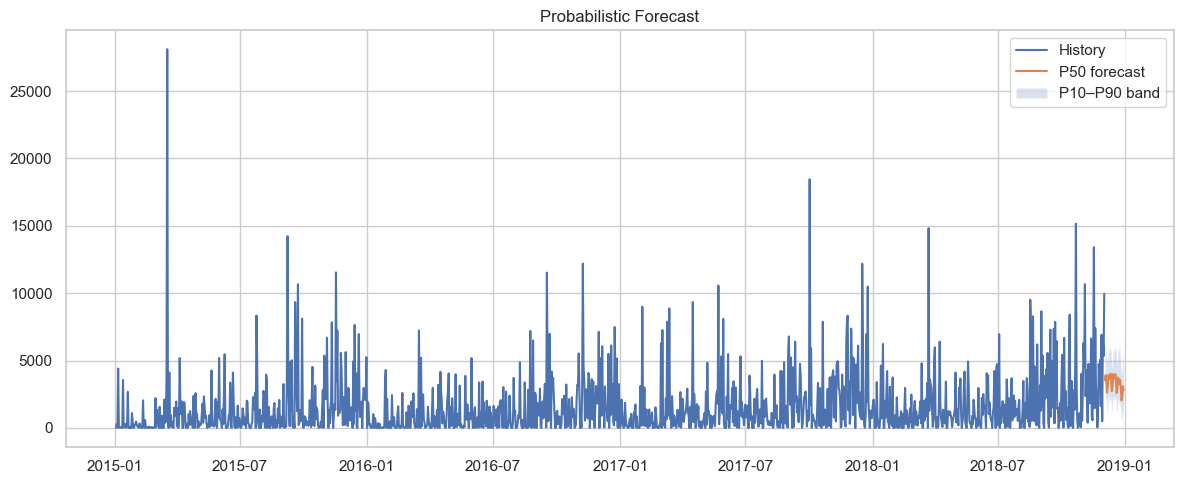

In [27]:
plt.figure(figsize=(12,5))
plt.plot(history["ds"], history["y"], label="History")
plt.plot(merged["ds"], merged["p50"], label="P50 forecast")
plt.fill_between(merged["ds"], merged["p10"], merged["p90"], alpha=0.2, label="P10–P90 band")
plt.legend(); plt.title("Probabilistic Forecast"); plt.tight_layout(); plt.savefig("../assets/forecast_example.png", dpi=200);
plt.show()

## 📊 Forecasting Conclusion: SARIMA vs Prophet

We compared two time-series models to forecast 7 days of retail sales:

| Model     | Avg. Predicted Sales | Forecast Nature         | Strengths                            |
|-----------|----------------------|--------------------------|---------------------------------------|
| **SARIMA** | ~2,908 units/day     | Higher, seasonality-aware | Captures recent trends & seasonality |
| **Prophet**| ~2,003 units/day     | Conservative, smoother    | Easy to interpret, stable forecasts  |

### 🔍 Observations:
- **SARIMA consistently predicts higher sales**, with differences of **+380 to +1,492 units/day** compared to Prophet.
- **Prophet** is more cautious and may underpredict during high-variance or post-holiday periods.
- Both models show strong seasonality, but SARIMA adapts better to **recent high demand**.

### ✅ Recommendation:
- Use **SARIMA** when planning for **growth or peak season** logistics.
- Use **Prophet** for **baseline operations** or risk-averse inventory decisions.
- For balanced planning, consider **averaging both models' predictions**.

<div style=" padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>✅ Summary</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Through a blend of exploratory data analysis and time-series modeling, we identified key revenue drivers across geography, categories, and segments. We also produced 7-day forecasts using Prophet and SARIMA, where SARIMA showed stronger sensitivity to seasonality and recent spikes.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    This notebook demonstrates a complete retail analytics pipeline — from data cleaning to business-ready forecasting.
  </p>
</div>